# US compared to other countries based on Gun Violence

Through this notebook we understand how US fares among other countries in the world in context to gun violence

In [1]:
import pandas as pd
import xlrd


The dataset has been extracted from Small Arms Survey. They have a limited of amount of global data but extensive research on gun violence. 
<br>
Link: http://www.smallarmssurvey.org/
<br>
The dataset is the rate of guns per 100 people of the total population of the country. 


In [2]:
#Reading in the excel file
global_data = pd.read_excel('global_data.xlsx')

There were a few discrepancies in the data format of the excel file and sheets. Due to the excel drop down and merge features reading in the data was a task. 
So performed a few changes in the excel file itself before reading it in, in the interest of time. 


In [3]:
#the data is in the normalized form
global_data.head()

,Region,Sub-region,ISO,Country,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016
0,Africa,Eastern Africa,BDI,Burundi,16.387164,8.594573,6.631630,5.592240,6.928662,5.701475,5.611999,5.418251,5.965851,5.281148,5.651151,11.187075,7.449556
1,Africa,Eastern Africa,COM,Comoros,11.385936,11.444884,11.493794,11.377451,11.411548,11.437025,10.149458,10.190088,10.222858,10.114633,10.271470,9.261355,9.175454
2,Africa,Eastern Africa,DJI,Djibouti,9.601013,9.703110,9.796435,9.760292,9.721314,9.679270,8.929138,8.892102,8.851717,8.810199,8.879982,7.763523,7.746731
3,Africa,Eastern Africa,ERI,Eritrea,11.506696,11.514215,11.508250,11.532909,11.529458,11.530429,10.613003,10.637608,10.611761,10.621376,10.619368,9.634873,9.647513
4,Africa,Eastern Africa,ETH,Ethiopia,12.395409,12.174319,11.994822,12.328333,11.461216,11.667569,11.029311,10.344626,10.380318,9.844266,9.424159,9.467020,10.332685


Normalization ensure that the values of each country compares to other countries is on the same par.  Otherwise the outliers may be way too much. As countries affected by terrorism have a higher gun rate. 

In [4]:
#finding nulls
global_data.isnull().head(16)

,Region,Sub-region,ISO,Country,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In order to build a model we need to take care of inconsistent data. 
<br>
Notice that in the above model there is only one row that has nulls. See row number 15.

##### Reason for null in one row: 
<br>
South Sudan came into existence in 2011 and hence there can't be any past data about it. It never existed! 

Taking the mean to fill the values isn't the right approach for this data as this can alter the prediction of the years to come.
Therefore, fill the value with zero.

In [6]:
#fill NaN values such as Sudan with 0
global_data = global_data.fillna(0)

global_data.head(17)

,Region,Sub-region,ISO,Country,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016
0,Africa,Eastern Africa,BDI,Burundi,16.387164,8.594573,6.631630,5.592240,6.928662,5.701475,5.611999,5.418251,5.965851,5.281148,5.651151,11.187075,7.449556
1,Africa,Eastern Africa,COM,Comoros,11.385936,11.444884,11.493794,11.377451,11.411548,11.437025,10.149458,10.190088,10.222858,10.114633,10.271470,9.261355,9.175454
2,Africa,Eastern Africa,DJI,Djibouti,9.601013,9.703110,9.796435,9.760292,9.721314,9.679270,8.929138,8.892102,8.851717,8.810199,8.879982,7.763523,7.746731
3,Africa,Eastern Africa,ERI,Eritrea,11.506696,11.514215,11.508250,11.532909,11.529458,11.530429,10.613003,10.637608,10.611761,10.621376,10.619368,9.634873,9.647513
4,Africa,Eastern Africa,ETH,Ethiopia,12.395409,12.174319,11.994822,12.328333,11.461216,11.667569,11.029311,10.344626,10.380318,9.844266,9.424159,9.467020,10.332685
5,Africa,Eastern Africa,KEN,Kenya,7.281554,7.734070,7.621711,8.664622,9.165122,7.060630,7.018112,7.929514,8.772728,9.264537,8.241308,7.953636,7.350154
6,Africa,Eastern Africa,MDG,Madagascar,12.228278,12.030502,11.821866,11.866093,11.637055,11.084577,11.086611,10.287920,9.938884,9.681573,9.444760,9.210167,9.210851
7,Africa,Eastern Africa,MWI,Malawi,3.881339,1.840532,7.327283,5.975015,6.551641,2.602857,4.107576,2.629959,2.074881,2.075146,2.079814,2.076978,2.078315
8,Africa,Eastern Africa,MUS,Mauritius,3.454865,3.600646,4.885604,4.376329,4.680088,5.224980,4.887997,4.316467,4.707305,3.903480,2.863463,2.778978,2.773086
9,Africa,Eastern Africa,MYT,Mayotte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Summarizing the dataset to know the category that each country falls in for further analysis

In [7]:
global_data.describe()

,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,9.427981,9.759551,9.952239,10.172388,10.044812,10.343846,9.697379,11.052278,10.668643,10.659536,11.795948,10.705029,10.384819
std,12.214033,13.941224,14.736922,16.335935,13.201989,15.009140,13.453419,22.691799,18.786023,22.010650,23.069126,19.247747,17.940632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.236150,1.849975,2.022166,1.982096,2.061409,1.815784,1.920381,1.801252,1.976822,1.711950,1.783288,1.755832,1.762633
50%,5.236470,5.073567,5.149620,4.994294,5.500522,5.037795,4.917920,4.832412,5.144424,4.691425,4.935924,4.851504,4.650514
75%,12.275784,12.079963,11.994822,11.587905,11.708629,11.667569,11.502468,11.681420,11.597420,11.060709,11.291082,10.922385,10.532116
max,85.094550,99.117216,138.580843,168.282041,69.495169,85.542837,91.216626,273.447925,203.636496,267.846041,235.790178,181.537356,158.807817


In [8]:
# Find correlations and sorting based on the values for Year 2016
global_data.corr()['Year2016'].sort_values()

Year2005    0.549767
Year2004    0.583522
Year2007    0.585126
Year2006    0.605255
Year2011    0.610477
Year2009    0.625493
Year2008    0.642555
Year2010    0.686962
Year2013    0.892982
Year2014    0.900877
Year2012    0.921325
Year2015    0.989664
Year2016    1.000000
Name: Year2016, dtype: float64

The years from 2005 - 2010 have a low correlation with Year 2016.
<br>
This could be that gun violence was on a low during those years and has increased since.
<br>
For this purpose further when the model is going to be built, only the years 2013 - 2016 will be considered. 

#### Finding the countries with the highest number of gun violence based on the correlation with data from year 2016

In [9]:
# Select only categorical variables
category_df = global_data['Country']
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the year back in the dataframe
dummy_df['Year2016'] = global_data['Year2016']
# Find correlations with year
dummy_df.corr()['Year2016'].sort_values(ascending = False).head(15)

#print(type(df_sort))


#data_sorted = df_sort.sort_values(, ascending=False)


Year2016                 1.000000
Syrian Arab Republic     0.559032
El Salvador              0.336422
Venezuela                0.271826
Saint Kitts and Nevis    0.256318
Honduras                 0.215901
Afghanistan              0.206246
Jamaica                  0.172259
Iraq                     0.162844
Libya                    0.143965
Somalia                  0.126902
South Sudan              0.116001
Belize                   0.115875
Trinidad and Tobago      0.113757
South Africa             0.113292
Name: Year2016, dtype: float64

In [10]:
#One hot encoded data
dummy_df.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,Armenia,Aruba,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Year2016
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.449556
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.175454
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.746731
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.647513
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.332685


Creating a concise form of the above table. 
<br>
By this we can divivde the countries by the amount of violence, viz. high_violence, medium_violence, low_violence


In [11]:
#frequency count of all the countries in the dataset
freq = global_data.groupby('Country').count()['Year2016']
#taking th mean to help categorize the data into the 3 levels
mean = global_data.groupby('Country').mean()['Year2016']
cluster = pd.concat([freq, mean], axis=1)
cluster['Country'] = cluster.index

In [12]:
cluster.columns = ['freq', 'Year2016','Country']

In [13]:
cluster.describe()

,freq,Year2016
count,221.0,221.000000
mean,1.0,10.384819
std,0.0,17.940632
min,1.0,0.000000
25%,1.0,1.762633
50%,1.0,4.650514
75%,1.0,10.532116
max,1.0,158.807817


Based on this table:
    The countries with a mean less than 4.76 will be in the Low Violence Category
    The countries with a mean higher or equal to 4.76 but lesser than 10.5 will be in the Medium Violence Category
    The countries with a mean higher than or equal to 10.5 will be in the High Violence Category

In [14]:
cluster1 = cluster[cluster.Year2016 < 4.76]
#display the countries with low violence
#length of countries is 112
cluster1.index

Index(['Albania', 'Algeria', 'Andorra', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       ...
       'Thailand', 'Tonga', 'Tunisia', 'UK (England, Wales)',
       'UK (Northern Ireland)', 'UK (Scotland)', 'United Arab Emirates',
       'Uzbekistan', 'Vanuatu', 'Vietnam'],
      dtype='object', name='Country', length=112)

In [15]:

cluster_temp = cluster[cluster.Year2016  >= 4.6]

cluster2 = cluster_temp[cluster_temp.Year2016  < 10.5]

#display the countries with low violence

cluster2.index

Index(['Angola', 'Argentina', 'Benin', 'Bermuda', 'Burundi', 'Cameroon',
       'Cape Verde', 'Chile', 'Comoros', 'Cook Islands', 'Cuba', 'Djibouti',
       'Dominica', 'Ecuador', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon',
       'Grenada', 'Guam', 'Iran (Islamic Republic Of)', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Korea, Democratic People's Republic of', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Lebanon', 'Lithuania',
       'Madagascar', 'Mali', 'Micronesia (Fed. States of)', 'Mongolia',
       'Nicaragua', 'Niger', 'Pakistan', 'Palau', 'Peru',
       'Republic of Moldova', 'Russian Federation', 'Rwanda', 'Senegal',
       'Seychelles', 'Solomon Islands', 'Suriname', 'Swaziland', 'Timor-Leste',
       'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Ukraine',
       'United Republic of Tanzania', 'United States', 'Uruguay', 'Zambia'],
      dtype='object', name='Country')

#### Note that US falls in the category with medium gun violence based on this dataset
The countries falling in the higher violence category are also countries with a history of terrorist attacks and large drug and other issues. 

In [16]:
cluster3 = cluster[cluster.Year2016  >= 10.5]
cluster3.index

Index(['Afghanistan', 'Anguilla', 'Antigua And Barbuda', 'Bahamas', 'Barbados',
       'Belize', 'Bolivia', 'Botswana', 'Brazil', 'Central African Republic',
       'Chad', 'Colombia', 'Congo', 'Costa Rica', 'Cote d'Ivoire', 'Curaçao',
       'Democratic Republic of the Congo', 'Dominican Republic', 'El Salvador',
       'Gambia', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Iraq', 'Jamaica', 'Lesotho', 'Libya',
       'Mauritania', 'Mexico', 'Namibia', 'Nigeria', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Philippines', 'Puerto Rico',
       'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon',
       'Saint Vincent And The Grenadines', 'Somalia', 'South Africa',
       'South Sudan', 'Sudan', 'Syrian Arab Republic', 'Togo',
       'Trinidad and Tobago', 'Tuvalu', 'Uganda', 'Venezuela', 'Yemen',
       'Zimbabwe'],
      dtype='object', name='Country')

In [17]:
#Defining the categories 
def get_group(x):
    if x in cluster1.index:
        return 'low_violence'
    elif x in cluster2.index:
        return 'medium_violence'
    
    else:
        return 'high_violence'
    
global_data['group'] = global_data.Country.apply(get_group)

In [18]:
global_data.head()

,Region,Sub-region,ISO,Country,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,group
0,Africa,Eastern Africa,BDI,Burundi,16.387164,8.594573,6.631630,5.592240,6.928662,5.701475,5.611999,5.418251,5.965851,5.281148,5.651151,11.187075,7.449556,medium_violence
1,Africa,Eastern Africa,COM,Comoros,11.385936,11.444884,11.493794,11.377451,11.411548,11.437025,10.149458,10.190088,10.222858,10.114633,10.271470,9.261355,9.175454,medium_violence
2,Africa,Eastern Africa,DJI,Djibouti,9.601013,9.703110,9.796435,9.760292,9.721314,9.679270,8.929138,8.892102,8.851717,8.810199,8.879982,7.763523,7.746731,medium_violence
3,Africa,Eastern Africa,ERI,Eritrea,11.506696,11.514215,11.508250,11.532909,11.529458,11.530429,10.613003,10.637608,10.611761,10.621376,10.619368,9.634873,9.647513,medium_violence
4,Africa,Eastern Africa,ETH,Ethiopia,12.395409,12.174319,11.994822,12.328333,11.461216,11.667569,11.029311,10.344626,10.380318,9.844266,9.424159,9.467020,10.332685,medium_violence


#### Focusing on US


Text(0,0.5,'Gun rate')

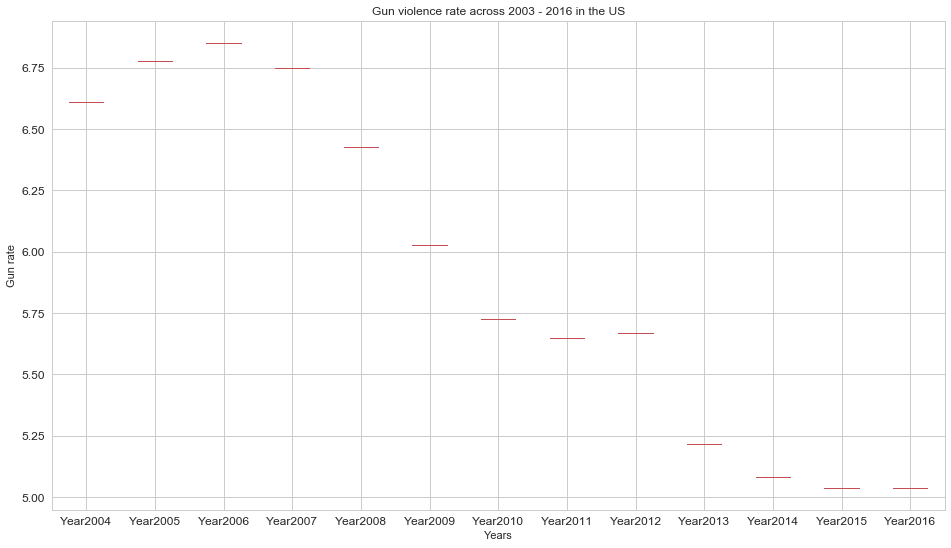

In [70]:
%matplotlib inline
us_row = global_data.loc[[91]]
#us_row.plot(kind = 'box',figsize = (16,9) )
#plt.show()

ax = us_row.plot(figsize = (16,9), kind = 'box',title='Gun violence rate across 2003 - 2016 in the US',fontsize = 12)
ax.set_xlabel("Years")
ax.set_ylabel("Gun rate")


Since US lies in the medium violence group let's focus on that group 

In [20]:
p_medium=global_data.loc[global_data['group'] == 'medium_violence']
#
p_medium.head()

,Region,Sub-region,ISO,Country,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,group
0,Africa,Eastern Africa,BDI,Burundi,16.387164,8.594573,6.631630,5.592240,6.928662,5.701475,5.611999,5.418251,5.965851,5.281148,5.651151,11.187075,7.449556,medium_violence
1,Africa,Eastern Africa,COM,Comoros,11.385936,11.444884,11.493794,11.377451,11.411548,11.437025,10.149458,10.190088,10.222858,10.114633,10.271470,9.261355,9.175454,medium_violence
2,Africa,Eastern Africa,DJI,Djibouti,9.601013,9.703110,9.796435,9.760292,9.721314,9.679270,8.929138,8.892102,8.851717,8.810199,8.879982,7.763523,7.746731,medium_violence
3,Africa,Eastern Africa,ERI,Eritrea,11.506696,11.514215,11.508250,11.532909,11.529458,11.530429,10.613003,10.637608,10.611761,10.621376,10.619368,9.634873,9.647513,medium_violence
4,Africa,Eastern Africa,ETH,Ethiopia,12.395409,12.174319,11.994822,12.328333,11.461216,11.667569,11.029311,10.344626,10.380318,9.844266,9.424159,9.467020,10.332685,medium_violence


In [96]:
country=p_medium.groupby(['Country'])['Year2015','Year2016'].agg('count').reset_index()
pp=p_medium.sort_values('Year2016',ascending=False)
print('Number of medium violence countries:',len(pp))

Number of medium violence countries: 53


##### Lets plot all the 53 countries in this group

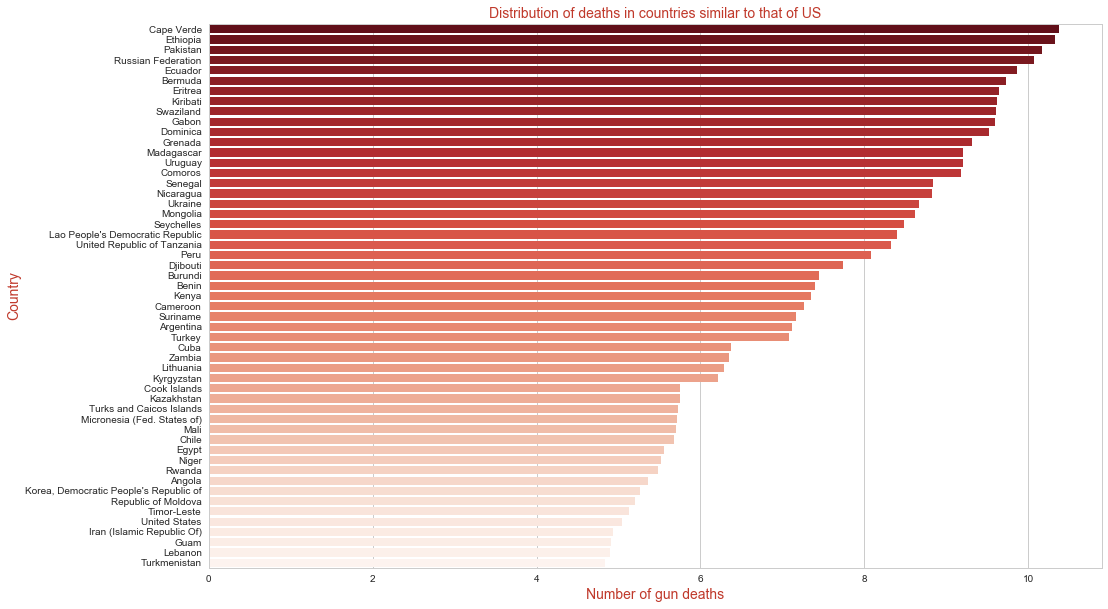

In [85]:
import seaborn as sb
sb.set(rc={'figure.figsize':(16,10)})
sb.set_style("whitegrid")
sb.barplot(x=pp['Year2016'],y=pp['Country'],palette="Reds_r")
plt.xlabel("Number of gun deaths",fontsize=14,color='#C0392B')
plt.ylabel("Country",fontsize=14,color='#C0392B')
plt.title("Distribution of deaths in countries similar to that of US",fontsize=14,color='#C0392B')
plt.show()


The highest correlation with the Year 2016 is between the years 2013 - 2015, thus for building the model only these years are considered.

In [98]:
df = global_data[['Year2013','Year2014','Year2015','Year2016','group']]
df.head()

,Year2013,Year2014,Year2015,Year2016,group
0,5.281148,5.651151,11.187075,7.449556,medium_violence
1,10.114633,10.271470,9.261355,9.175454,medium_violence
2,8.810199,8.879982,7.763523,7.746731,medium_violence
3,10.621376,10.619368,9.634873,9.647513,medium_violence
4,9.844266,9.424159,9.467020,10.332685,medium_violence


To add value to the data, consider the three categories. 
<br>
For this lets encode the categorical variables. Basically, one hot encoding.

In [100]:

X = df[['Year2013','Year2014','Year2015','group']]
Y = df[['Year2016']]
#create dummy variables for groups
n = pd.get_dummies(df.group)
X = pd.concat([X, n], axis=1)

In [101]:
X.head(20)

,Year2013,Year2014,Year2015,group,high_violence,low_violence,medium_violence
0,5.281148,5.651151,11.187075,medium_violence,0,0,1
1,10.114633,10.271470,9.261355,medium_violence,0,0,1
2,8.810199,8.879982,7.763523,medium_violence,0,0,1
3,10.621376,10.619368,9.634873,medium_violence,0,0,1
4,9.844266,9.424159,9.467020,medium_violence,0,0,1
5,9.264537,8.241308,7.953636,medium_violence,0,0,1
6,9.681573,9.444760,9.210167,medium_violence,0,0,1
7,2.075146,2.079814,2.076978,low_violence,0,1,0
8,3.903480,2.863463,2.778978,low_violence,0,1,0
9,0.000000,0.000000,0.000000,low_violence,0,1,0


One hot encoding
<br>
Drop the group column since its already converted into three separate columns based on the three categories. 
<br>
Also, since the linear model cannot process any categorical value.


In [104]:
X = X.drop(['group'], axis=1)
X.head()

,Year2013,Year2014,Year2015,high_violence,low_violence,medium_violence
0,5.281148,5.651151,11.187075,0,0,1
1,10.114633,10.271470,9.261355,0,0,1
2,8.810199,8.879982,7.763523,0,0,1
3,10.621376,10.619368,9.634873,0,0,1
4,9.844266,9.424159,9.467020,0,0,1


### Using the sklearn model for modeling
Splitting the data into train and test using the 80:20 split.

In [107]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

The data present in the dataset is continuous hence we use the linear regression model over logistic regression.


#### Linear regression

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regressor = LinearRegression()
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [130]:
# Make predictions using the testing set
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))
print('_____________________________________')

# The coefficients
print('Coefficients: \n', regressor.coef_)
print('_____________________________________')
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,y_pred))
print('_____________________________________')
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('_____________________________________')

Liner Regression R squared: 0.9688
_____________________________________
Coefficients: 
 [[ 0.02482151  0.02133603  0.8072133   1.71462968 -1.1456981  -0.56893159]]
_____________________________________
Mean squared error: 13.29
_____________________________________
Variance score: 0.97
_____________________________________


In [135]:
#5.21746  5.080279  5.038928  5.038804
X_test_US = {'Year2013':[5.21746],'Year2014':[5.080279], 'Year2015':[5.038928],'high_violence': [0], 
             'medium_violence':[1],'low_violence':[0]}
X_test_US = pd.DataFrame(data=X_test_US)
#print(X_test_US)
y_pred_US = regressor.predict(X_test_US)
print("Printing the predicted value based on the model",y_pred_US)

Printing the predicted value based on the model [[5.08641268]]


#### Plotting the actual value with the predicted value
The value is pretty close and so we can say our model is doing well. 

In [193]:
import plotly.plotly as py
import plotly.graph_objs as go


data = [go.Bar(
            x=['Actual','Predicted'],
            y=[5.038804,5.08641268]
    )]

layout = {
  'xaxis': {'title': 'Year 2016'},
  'yaxis': {'title': 'Gun rate'},
  'barmode': 'relative',
  'title': 'Actual vs Predicted'
};

#py.iplot(data,layout = layout, filename='grouped-bar-direct-labels')
py.iplot({'data': data, 'layout': layout}, filename='barmode-relative')


In [159]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 3.6459


In [160]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print('Liner Regression MAE: %.4f' % lin_mae)


Liner Regression MAE: 1.2527


#### Random forest model

In [161]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, y_train)

C:\Users\lobof\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [162]:
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.9463


In [168]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

y_pred_US = forest_reg.predict(X_test_US)
forest_mse_US = mean_squared_error(y_pred, y_test)
forest_rmse_US = np.sqrt(forest_mse)


Random Forest RMSE: 4.7841


#### Gradient Boosting model

In [164]:

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

C:\Users\lobof\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [165]:
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

Gradient Boosting R squared": 0.8986


In [166]:
y_pred = model.predict(X_test)
y_pred_US = model.predict(X_test_US)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
#print(y_pred)
print(y_pred_US)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

[5.20383401]
Gradient Boosting RMSE: 6.5755


#### Lets compare US with only the countries in the North America

In [222]:
north_amer = global_data.loc[global_data['Sub-region'] == 'Northern America']
north_amer.head()

,Region,Sub-region,ISO,Country,Year2004,Year2005,Year2006,Year2007,Year2008,Year2009,Year2010,Year2011,Year2012,Year2013,Year2014,Year2015,Year2016,group
87,Americas,Northern America,BMU,Bermuda,3.073849,6.141563,6.147887,6.164088,9.284333,10.885962,12.508600,15.727969,11.079631,9.558554,9.618159,9.676951,9.729835,medium_violence
88,Americas,Northern America,CAN,Canada,2.341201,2.459119,2.223891,2.156273,2.191318,2.163373,1.943301,2.087518,1.873888,1.738736,1.752576,2.013925,2.014339,low_violence
89,Americas,Northern America,GRL,Greenland,22.862771,21.070745,10.531674,22.836264,28.148695,38.781554,38.843179,21.219409,10.625111,7.090439,24.830620,14.190184,14.181380,high_violence
90,Americas,Northern America,SPM,Saint Pierre and Miquelon,0.000000,0.000000,0.000000,0.000000,15.951507,15.931177,15.938795,15.938795,15.933716,15.941336,15.931177,15.898251,15.860428,high_violence
91,Americas,Northern America,USA,United States,6.609026,6.776347,6.850949,6.747613,6.426390,6.027908,5.725091,5.646977,5.669324,5.217460,5.080279,5.038928,5.038804,medium_violence


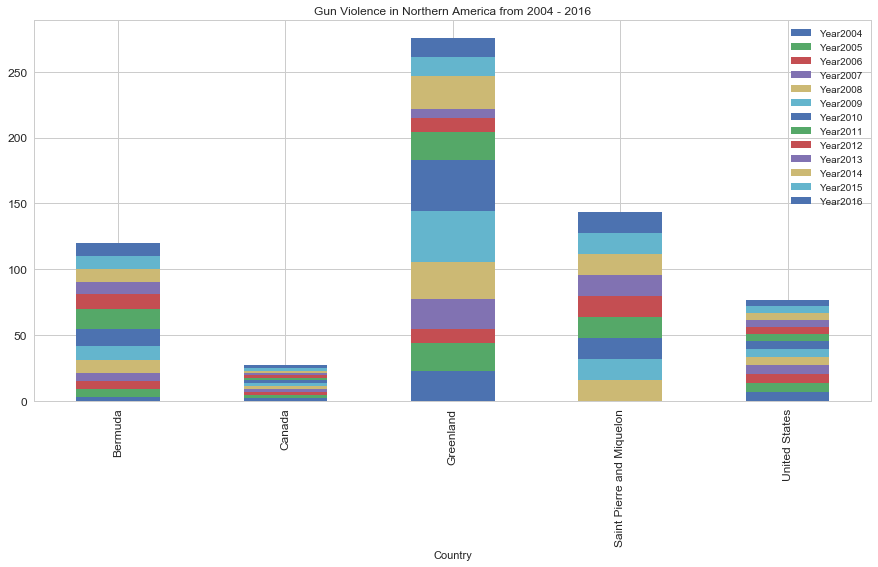

In [227]:

ax.set_xlabel("Country")
ax.set_ylabel("Gun rate")

ax = north_amer.plot.bar(x='Country',stacked=True, figsize = (15,7), title = 'Gun Violence in Northern America from 2004 - 2016'
                        ,fontsize =12)

### Conclusion:

For each of the model that we just evaluated we noticed that the rmse values are too large. 
<br>
This could be since the dataset is quite small. This can be overcome by collecting more data over the years and also my comparing gun violence deaths over overall violent deaths globally. 
<br>

This gives us a broad view of how US is fairing among other countries.
<br>
Compared to the countries in the Middle East, the gun violence in the US is less. Overall, from the above chart you can also that the gun violence in United States compared with countries in Northern America is also lesser.
<br>
But it's pretty large in comparison with Canada. 


#### References:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
<br>
http://www.smallarmssurvey.org/
<br>
http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/